In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/hardpoint.csv')

In [4]:
df.head()

,HARDPOINT,Player,Unnamed: 2,Mode,Team,Event,Vs Who,Date,Group / Bracket,Map ID,...,Role,Kills,Death,K/D,Plus / Minus,Hill Time,Assists,% of Team Kills,% of Team Deaths,Ranking
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,ACHES,NaN,HP,LAG,LW,MIN,1/24/2020,G,#00010,...,Flex,20.0,29.0,0.69,-9.0,-,-,16.5%,23.4%,#1
3,NaN,ACHES,NaN,HP,LAG,LW,MIN,1/24/2020,G,#00013,...,Flex,20.0,30.0,0.67,-10.0,-,-,20.4%,22.6%,#2
4,NaN,Alexx,NaN,HP,MIN,LW,LAG,1/24/2020,G,#00013,...,SMG,30.0,18.0,1.67,12.0,-,-,22.6%,18.4%,#3


In [5]:
df = df.drop(['HARDPOINT', 'Unnamed: 2'], axis=1)[2:]

In [6]:
df['Player'] = df['Player'].replace(['Accuarcy', 'Formal', 'Shozzy'], ['Accuracy', 'FormaL', 'Shotzzy'])

In [7]:
df['Player'].unique()

array(['ACHES', 'Alexx', 'Apathy', 'AquA', 'Arcitys', 'Asim', 'Assault',
       'Clayster', 'Crimsix', 'Decemate', 'Enable', 'Envoy', 'FormaL',
       'Frosty', 'GodRx', 'Gunless', 'Havok', 'Huke', 'iLLey', 'Karma',
       'Lacefield', 'Maux', 'Octane', 'Prestinni', 'Saints', 'Scump',
       'Shotzzy', 'SiLLY', 'Skyz', 'Slacked', 'aBeZy', 'Accuracy',
       'Attach', 'Cammy', 'Cellium', 'Classic', 'Dashy', 'Denz', 'Dylan',
       'JKap', 'Jurd', 'Kenny', 'KiSMET', 'Loony', 'Louqa', 'MajorManiak',
       'Methodz', 'MeTTalZz', 'Priestahh', 'Rated', 'Shockz', 'Simp',
       'Skrapz', 'Slasher', 'Temp', 'TJHaly', 'wuskin', 'Zed', 'Zer0',
       'ZooMaa', 'Bance', 'Blazt', 'Fero', 'Happy', 'Pandur', 'Spart',
       'Vivid', 'Mack', 'Seany', 'Chino', 'Proto', 'Owakening', 'Exceed',
       'SlasheR', 'CleanX', 'Drazah', 'Hollow'], dtype=object)

In [8]:
df = df.drop('Ranking', axis=1).reset_index()

In [9]:
df = df.drop('index', axis=1)

In [10]:
df.to_csv('hp_cleaned.csv', index=False)

In [102]:
pd.crosstab(df['Team'], df['Vs Who'])

Vs Who,ATL,CHI,DAL,FL,LAG,LON,MIN,NY,OGLA,PAR,SEA,TOR
Team,,,,,,,,,,,,
ATL,0,5,45,25,20,25,25,40,20,15,20,30
CHI,5,0,30,30,15,30,20,45,15,30,10,25
DAL,45,30,0,45,10,26,30,15,20,15,30,20
FL,25,30,45,0,30,30,25,25,30,5,10,20
LAG,20,15,10,30,0,10,10,15,20,15,40,10
LON,25,30,25,30,10,0,10,30,25,25,10,10
MIN,25,20,30,25,10,10,0,15,20,30,35,20
NY,40,45,15,25,15,30,15,0,10,20,10,25
OGLA,20,15,20,30,20,25,20,10,0,25,15,25


In [38]:
player_avg = df.groupby('Player').mean()

In [39]:
player_avg.head()

,Kills,Death,K/D,Plus / Minus,Hill Time
Player,,,,,
ACHES,20.285714,32.000000,0.647143,-11.714286,37.714286
Accuracy,23.540000,21.700000,1.115000,1.840000,74.100000
Alexx,25.543478,24.413043,1.076087,1.130435,51.934783
Apathy,25.725000,26.875000,0.974000,-1.150000,33.700000
AquA,24.076923,25.641026,0.951538,-1.564103,35.000000


(array([ 2.,  2.,  3.,  9., 24., 12., 10., 11.,  2.,  2.]),
 array([0.64714286, 0.7169013 , 0.78665974, 0.85641818, 0.92617662,
        0.99593506, 1.06569351, 1.13545195, 1.20521039, 1.27496883,
        1.34472727]),
 <a list of 10 Patch objects>)

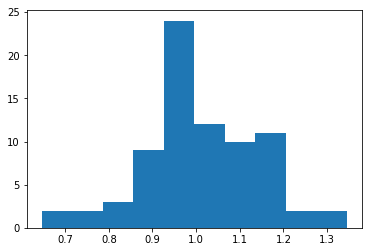

In [13]:
fig, ax = plt.subplots()
ax.hist(player_avg['K/D'])

Text(0.5, 1.0, 'Top 10 Regular Season K/D Players')

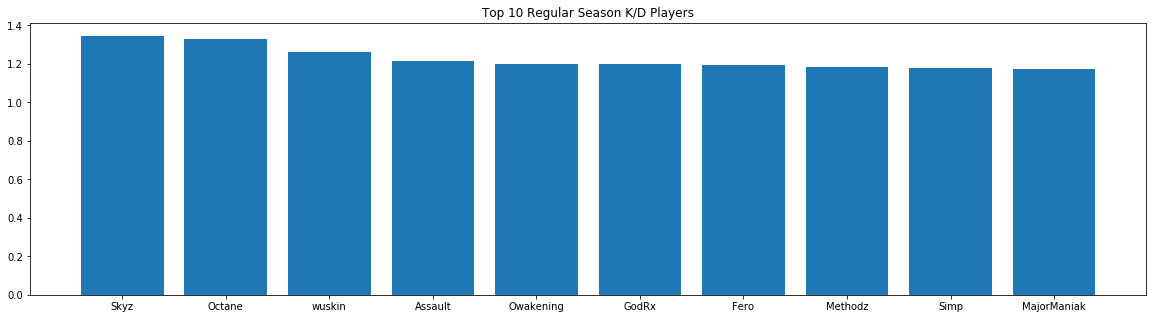

In [14]:
top_10_kd = player_avg.sort_values('K/D', ascending=False)[:10]

fig, ax = plt.subplots(figsize=(20,5))
ax.bar(top_10_kd.index, top_10_kd['K/D'])
ax.set_title('Top 10 Regular Season K/D Players')

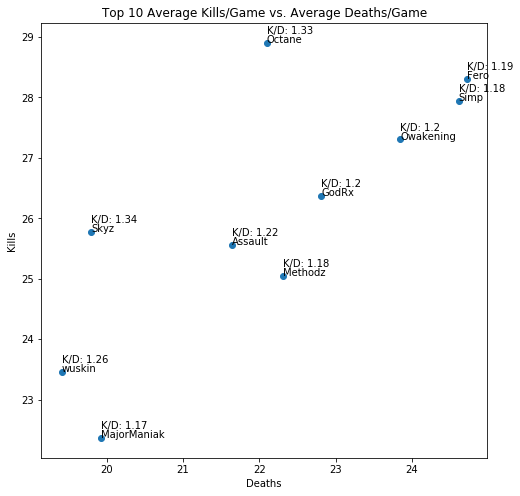

In [15]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(top_10_kd['Death'], top_10_kd['Kills'])
ax.set_xlabel('Deaths')
ax.set_ylabel('Kills')
ax.set_title('Top 10 Average Kills/Game vs. Average Deaths/Game')

for idx, name in enumerate(top_10_kd.index):
    ax.annotate(name, (top_10_kd['Death'][idx], top_10_kd['Kills'][idx]))
    kd = np.round(top_10_kd['K/D'][idx],2)
    ax.annotate(f"K/D: {kd}", (top_10_kd['Death'][idx], top_10_kd['Kills'][idx]+0.15))

In [16]:
player_count = df.groupby('Player').count()

In [17]:
player_count = player_count.sort_values('Mode')

<BarContainer object of 77 artists>

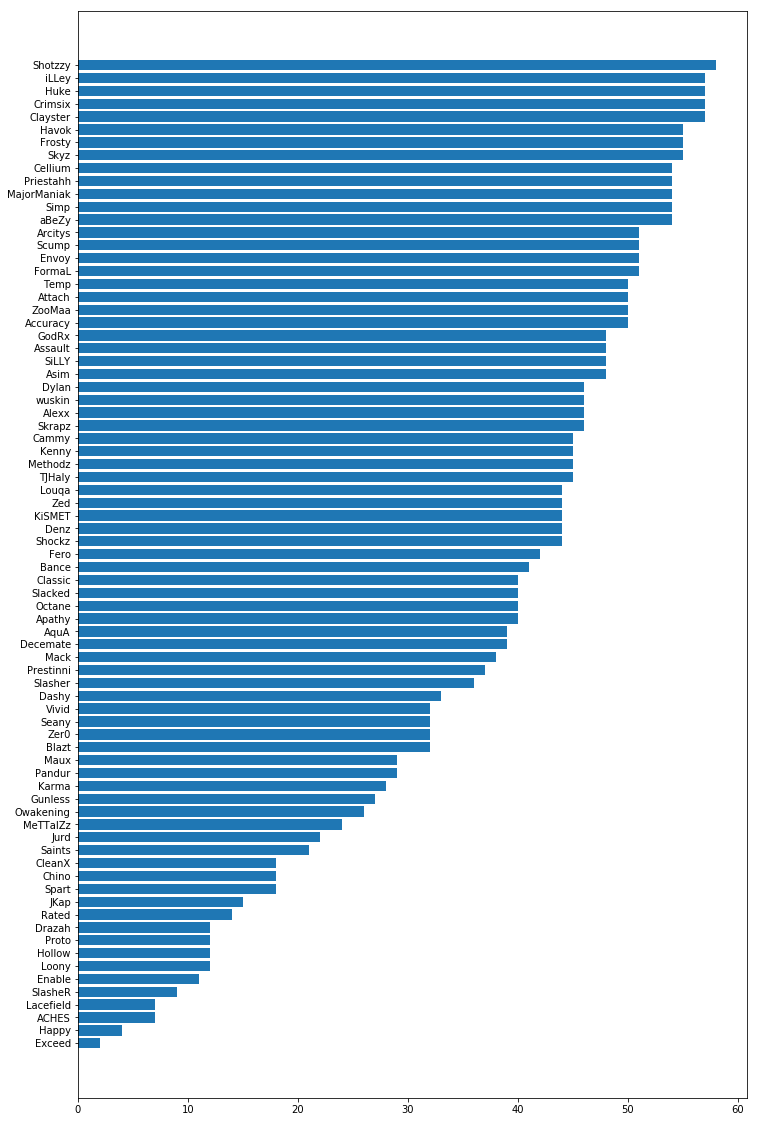

In [18]:
fig, ax = plt.subplots(figsize=(12,20))
ax.barh(player_count.index, player_count['Event'])

In [19]:
player_count

,Mode,Team,Event,Vs Who,Date,Group / Bracket,Map ID,Series ID,Map,Result,Role,Kills,Death,K/D,Plus / Minus,Hill Time,Assists,% of Team Kills,% of Team Deaths
Player,,,,,,,,,,,,,,,,,,,
Exceed,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2
Happy,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
ACHES,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,4,7,7
Lacefield,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,4,7,7
SlasheR,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,7,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Clayster,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,40,57,57
Crimsix,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,40,57,57
Huke,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,40,57,57


In [20]:
np.mean(player_count['Mode'])

37.285714285714285

In [21]:
np.min(player_count['Mode'])

2

In [22]:
player_count.describe()

,Mode,Team,Event,Vs Who,Date,Group / Bracket,Map ID,Series ID,Map,Result,Role,Kills,Death,K/D,Plus / Minus,Hill Time,Assists,% of Team Kills,% of Team Deaths
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,37.285714,37.285714,37.285714,37.285714,37.285714,37.285714,37.285714,37.285714,37.285714,37.285714,37.285714,37.285714,37.285714,37.285714,37.285714,37.285714,28.571429,37.285714,37.285714
std,15.675036,15.675036,15.675036,15.675036,15.675036,15.675036,15.675036,15.675036,15.675036,15.675036,15.675036,15.675036,15.675036,15.675036,15.675036,15.675036,12.347415,15.675036,15.675036
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000
25%,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,21.000000,27.000000,27.000000
50%,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,32.000000,42.000000,42.000000
75%,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,40.000000,50.000000,50.000000
max,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,45.000000,58.000000,58.000000


In [29]:
df['Hill Time'] = df['Hill Time'].fillna(0)

In [31]:
df['Hill Time'] = df['Hill Time'].replace('-', 0)

In [35]:
df['Hill Time'] = df['Hill Time'].astype(float).astype(int)

(array([ 1.,  5.,  6., 16., 15., 12., 11.,  6.,  4.,  1.]),
 array([25.        , 30.56428571, 36.12857143, 41.69285714, 47.25714286,
        52.82142857, 58.38571429, 63.95      , 69.51428571, 75.07857143,
        80.64285714]),
 <a list of 10 Patch objects>)

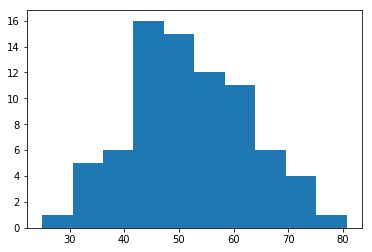

In [40]:
fig, ax = plt.subplots()
ax.hist(player_avg['Hill Time'])

In [51]:
wuskin = df[df['Player'] == 'wuskin']

In [52]:
wuskin

,Player,Mode,Team,Event,Vs Who,Date,Group / Bracket,Map ID,Series ID,Map,Result,Role,Kills,Death,K/D,Plus / Minus,Hill Time,Assists,% of Team Kills,% of Team Deaths
135,wuskin,HP,LON,LW,NY,1/25/2020,G,#00014,#00004,Azhir,W,AR,26.0,16.0,1.63,10.0,70,-,21.3%,15.2%
194,wuskin,HP,LON,LW,PAR,1/26/2020,G,#00035,#00009,Rammaza,L,AR,21.0,19.0,1.11,2.0,67,-,20.0%,15.7%
395,wuskin,HP,LON,LON,TOR,2/8/2020,G,#00059,#00016,Rammaza,W,AR,37.0,18.0,2.06,19.0,68,NaN,31.0%,15.0%
396,wuskin,HP,LON,LON,NY,2/8/2020,G,#00070,#00018,Hackney,W,AR,28.0,17.0,1.65,11.0,63,NaN,22.0%,17.0%
397,wuskin,HP,LON,LON,TOR,2/8/2020,G,#00062,#00016,Azhir,W,AR,25.0,16.0,1.56,9.0,93,NaN,19.0%,13.0%
398,wuskin,HP,LON,LON,NY,2/8/2020,G,#00067,#00018,Rammaza,L,AR,23.0,20.0,1.15,3.0,63,NaN,20.0%,17.0%
399,wuskin,HP,LON,LON,DAL,2/8/2020,B,#00088,#00023,Rammaza,W,AR,35.0,21.0,1.67,14.0,24,NaN,26.0%,18.0%
400,wuskin,HP,LON,LON,DAL,2/8/2020,B,#00091,#00023,Hackney,L,AR,30.0,18.0,1.67,12.0,0,NaN,26.0%,15.0%
649,wuskin,HP,LON,ATL,ATL,2/22/2020,G,#00125,#00032,Hackney,L,AR,30.0,17.0,1.76,13.0,11,9,26.0%,15.0%
650,wuskin,HP,LON,ATL,FL,2/22/2020,G,#00108,#00027,Azhir,W,AR,29.0,13.0,2.23,16.0,59,NaN,23.0%,14.0%


(array([ 2.,  1.,  6.,  2.,  8.,  7., 10.,  6.,  2.,  2.]),
 array([ 8. , 10.9, 13.8, 16.7, 19.6, 22.5, 25.4, 28.3, 31.2, 34.1, 37. ]),
 <a list of 10 Patch objects>)

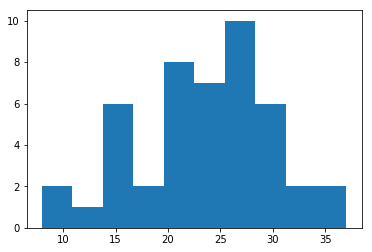

In [53]:
fig, ax = plt.subplots()
ax.hist(wuskin['Kills'])

In [59]:
pd.crosstab(wuskin['Map'], wuskin['Result'])

Result,L,W
Map,,
Azhir,4,6
Gun Runner,3,8
Hackney,7,4
Rammaza,6,2
St Petro,3,3


In [60]:
pd.crosstab(wuskin['Vs Who'], wuskin['Result'])

Result,L,W
Vs Who,,
ATL,5,0
CHI,5,1
DAL,3,2
FL,2,4
LAG,1,1
MIN,1,1
NY,2,4
OGLA,2,3
PAR,2,3


In [76]:
shotzzy = df[df['Player'] == 'Shotzzy']

Text(0, 0.5, 'Kills')

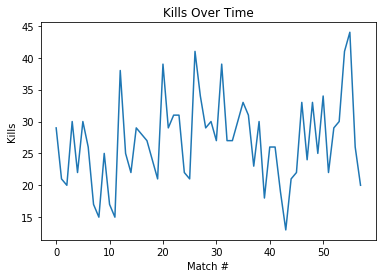

In [77]:
fig, ax = plt.subplots()
ax.plot(range(len(shotzzy)), shotzzy['Kills'])
ax.set_title('Kills Over Time')
ax.set_xlabel('Match #')
ax.set_ylabel('Kills')

In [79]:
clayster = df[df['Player'] == 'Clayster']

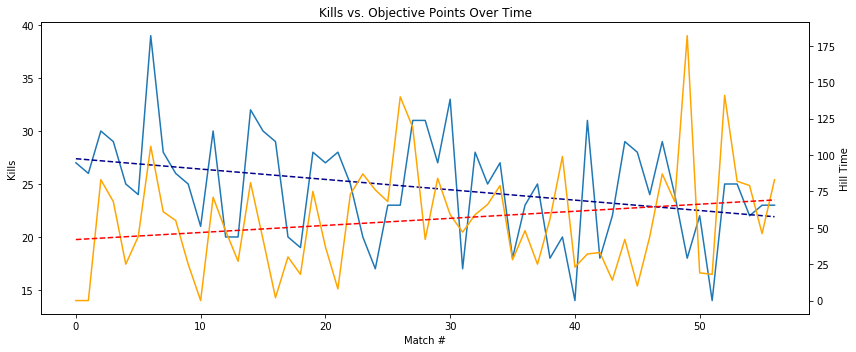

In [100]:
x = range(len(clayster))
y1 = clayster['Kills']
y2 = clayster['Hill Time']


fig, ax = plt.subplots(figsize=(12,5))
ax.plot(x, y1)
ax.set_title('Kills vs. Objective Points Over Time')
ax.set_xlabel('Match #')
ax.set_ylabel('Kills')

ax2 = ax.twinx()
ax2.plot(x, y2, color='orange')
ax2.set_ylabel('Hill Time')

z = np.polyfit(x, y1, 1)
z2 = np.polyfit(x, y2, 1)
p = np.poly1d(z)
p2 = np.poly1d(z2)

ax.plot(x,p(x),"r--", color='darkblue')
ax2.plot(x, p2(x), "r--", color='red')

fig.tight_layout()

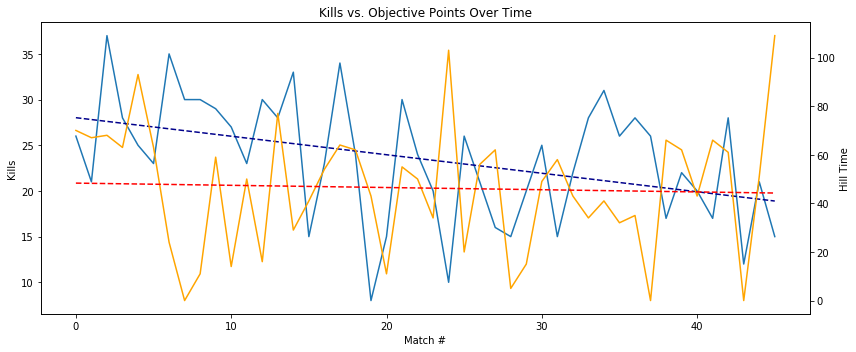

In [101]:
x = range(len(wuskin))
y1 = wuskin['Kills']
y2 = wuskin['Hill Time']


fig, ax = plt.subplots(figsize=(12,5))
ax.plot(x, y1)
ax.set_title('Kills vs. Objective Points Over Time')
ax.set_xlabel('Match #')
ax.set_ylabel('Kills')

ax2 = ax.twinx()
ax2.plot(x, y2, color='orange')
ax2.set_ylabel('Hill Time')

z = np.polyfit(x, y1, 1)
z2 = np.polyfit(x, y2, 1)
p = np.poly1d(z)
p2 = np.poly1d(z2)

ax.plot(x,p(x),"r--", color='darkblue')
ax2.plot(x, p2(x), "r--", color='red')

fig.tight_layout()

In [81]:
abezy = df[df['Player'] == 'aBeZy']

Text(0, 0.5, 'Kills')

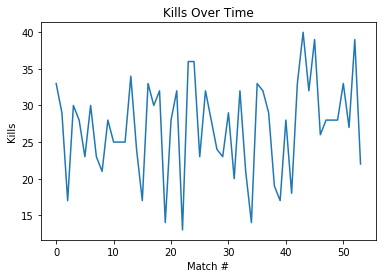

In [83]:
fig, ax = plt.subplots()
ax.plot(range(len(abezy)), abezy['Kills'])
ax.set_title('Kills Over Time')
ax.set_xlabel('Match #')
ax.set_ylabel('Kills')